# Data Analysis using XGBoost

In [1]:
%pylab inline
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from lib.XGBHelper import *

from lib.logger import logger

%load_ext autoreload

%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/yoavfreund/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
f'Version of xgb={xgb.__version__}, should be at least 1.5.1'

'Version of xgb=1.5.1, should be at least 1.5.1'

In [3]:
import pickle as pk
data=pk.load(open('data/RuralTanzania.pkl','rb'))
D=DataLoader(data)

param = {}
param['max_depth']= 3   # depth of tree
param['eta'] = 0.3      # shrinkage parameter
param['verbosity'] = 0  # 0= no logging 3=max logging
param['objective'] = 'binary:logistic'
param['nthread'] = 7 # Number of threads used
param['eval_metric'] = ['error','logloss']

data shape=(1216, 513)
train_size=608 validation_size=1, test_size=607


data shape=(1216, 513)
train_size=608 validation_size=1, test_size=607


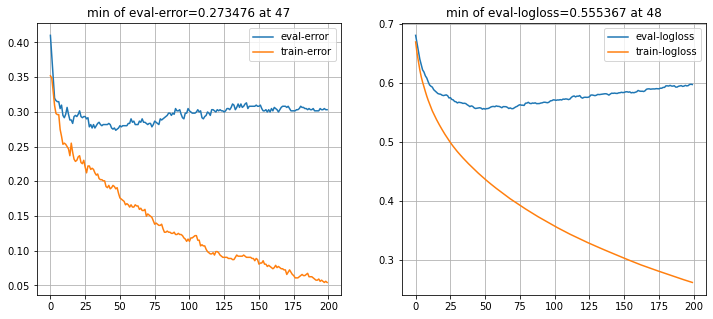

In [4]:
bst=test_xgboost(data,param,depth=1,num_round=200);

### Tree Depth 2

data shape=(1216, 513)
train_size=608 validation_size=1, test_size=607


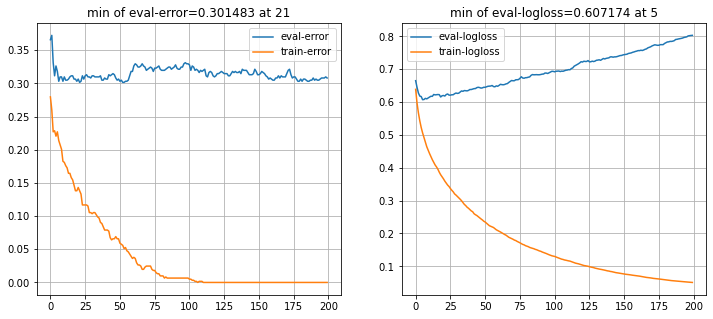

In [5]:
test_xgboost(data,param,depth=2,num_round=200);

### Tree Depth 3

data shape=(1216, 513)
train_size=608 validation_size=1, test_size=607


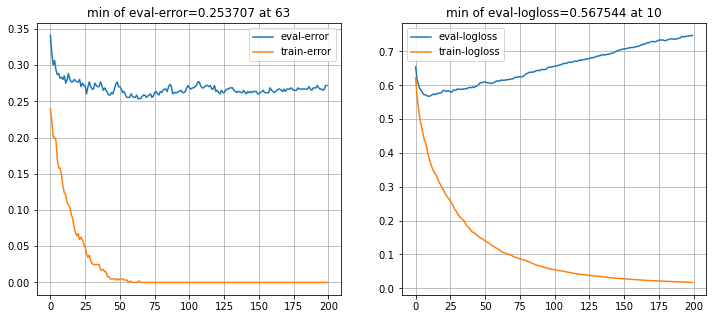

In [6]:
test_xgboost(data,param,depth=3,num_round=200);

## Stability Results

In [7]:
D=DataLoader(data)
X,y=D.get(['X','y'])
models=plot_margins(X,y,0.5,param)

data shape=(1216, 513)
train_size=608 validation_size=1, test_size=607


TypeError: plot_margins() missing 1 required positional argument: 'param'

# Things to think about
* If you consider the graphs of the error and log loss as a function of the number of boosting iterations, what would you select for tree depth and number of boosting iterations?
* If you consider the same question using the margins plots, what would be your conclusions in that case?
* Suppose the scores are split into three ranges using two threshold, the left threshold and the right threshold. TO the left of the left threshold you predict `Cuviers`, and to the right of the right threshold you predict `Gervais`. Between the two thresholds you don't predict, i.e. you say "I don't know". If you say "I don't know" you lose nothing. If you predict and you are right, you get 1 dollar. and if you predict and you are incorrect you lose 4 dollars. How should you choose the two threshold.

Think about these questions and we'll discuss them in the next class!

# Summary
* We saw how PCA+Boosting are used to solve a real-world problem.

* We saw several ways to quantify and understand the behaviour of boosted trees.
   * Train and test error
   * Train and test loss
   * ROC curves
   * Stability of scores

In [ ]:
%pwd